In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0'

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test / 255.0

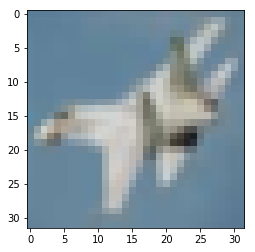

In [7]:
plt.imshow(X_test[10])

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [15]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dense (Dense)                (None, 8, 8, 128)         8

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [23]:
model.fit(X_train, y_train, epochs=6)

Train on 50000 samples
Epoch 1/6
   32/50000 [..............................] - ETA: 5:09

InvalidArgumentError:  Incompatible shapes: [32,1] vs. [32,8,8]
	 [[node metrics/sparse_categorical_accuracy/Equal (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_2684]

Function call stack:
distributed_function


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [ ]:
print("Test accuracy: {}".format(test_accuracy))